In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# generating dataset
X = np.random.randn(500,3)
y = 15*X[:,0] - 25*X[:,1] + 5*X[:,2] + 100 + (np.random.randn(500)*8)

In [67]:
def gradient_decent(X, y):
    n, m = X.shape
    w = np.zeros(3)    # weights
    b = 0    # bias
    loss = []
    r2score = []
    
    for _ in range(epochs):
        # for ploting
        y_pred = np.dot(X, w) + b
        loss.append(mse(y, y_pred))
        r2score.append(r2_score(y, y_pred))

        # gradients
        dw = (1/n) * np.dot(X.T, (y_pred - y))
        db = (1/n) * np.sum(y_pred - y)

        # update
        w -= lr * dw
        b -= lr * db
    return w, b, loss, r2score

In [53]:
def predict(x):
    return np.dot(x, w) + b

In [68]:
# mean square error
def mse(y_true, y_pred):
    err = 0
    for i in range(len(y_true)):
        err += (y_true[i] - y_pred[i]) ** 2
    return err / len(y_true)

In [55]:
def r2_score(y_true, y_pred):
    ssr = ((y_true - y_pred)** 2).sum()
    ssm = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - ssr/ssm

In [56]:
xTrain, xTest = X[:400], X[400:]
yTrain, yTest = y[:400], y[400:]

In [69]:
lr = 0.05    # learning rate
epochs = 100

w, b, loss, r2score = gradient_decent(xTrain, yTrain)

In [58]:
print(f'w = {w},\tb = {b}')

w = [ 14.49131705 -24.79824801   5.17527435],	b = 98.84136084716914


In [59]:
predict([10, -10, 5])

np.float64(517.6133831418231)

In [60]:
print(mse(yTest, predict(xTest)))

64.90779477339409


In [61]:
print(r2_score(yTest, predict(xTest)))

0.9400853328457883


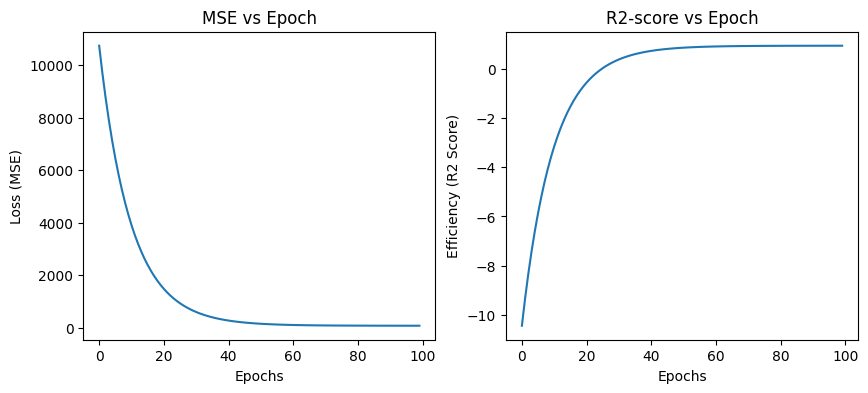

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('MSE vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(r2score)
plt.xlabel('Epochs')
plt.ylabel('Efficiency (R2 Score)')
plt.title('R2-score vs Epoch')
plt.show()